### Import necessary modules

In [1]:
import pandas as pd
import mysql.connector as mysql
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
sentiment_csv = pd.read_csv('customer_review.csv')

### Export csv file in databse 

In [3]:
conn = mysql.connect(host='127.0.0.1', database='python_lib', user='root', password='')

try:
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS sentiment;')
        print('Creating table....')
        # in the below line please pass the create table statement which you want to create
        cursor.execute("CREATE TABLE sentiment(user_id int(255),name varchar(255),age int(255),gender varchar(255),review varchar(255))")
        print("Table is created....")
        #loop through the data frame
        for i,row in sentiment_csv.iterrows():
            #here %S means string values 
            sql = "INSERT INTO python_lib.sentiment VALUES (%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except :
    print("Error while connecting to movies")

conn.close()

You're connected to database:  ('python_lib',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
R

### Import table from database to dataframe

In [4]:
connection = mysql.connect(host='127.0.0.1', database='python_lib', user='root', password='')
sentiment_query = "SELECT * FROM sentiment"

sentiment_df = pd.read_sql(sentiment_query, connection)

/tmp/ipykernel_128405/210899373.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sentiment_df = pd.read_sql(sentiment_query, connection)


### Extract sentiment of the review

In [5]:
# Perform sentiment analysis on each review
sentiments = []
for review in sentiment_df['review']:
    text_blob = TextBlob(review)
    sentiment = text_blob.sentiment.polarity
    
    if sentiment > 0:
        sentiment_category = 'good'
    elif sentiment < 0:
        sentiment_category = 'bad'
    else:
        sentiment_category = 'neutral'

    sentiments.append(sentiment_category)

# Add the sentiments to the dataset
sentiment_df['sentiment'] = sentiments

# Print the dataset with sentiments
print(sentiment_df)

# Save the DataFrame to a CSV file
sentiment_df.to_csv('data/sentiment_dataset.csv', index=False)

    user_id              name  age   gender  \
0         1        John Smith   32     Male   
1         2          Jane Doe   28   Female   
2         3   Michael Johnson   45     Male   
3         4      Emily Wilson   37   Female   
4         5       David Brown   19     Male   
..      ...               ...  ...      ...   
95       96    Grace Thompson   32   Female   
96       97      Aiden Wright   31     Male   
97       98        Zoe Turner   28   Female   
98       99    Matthew Harris   39     Male   
99      100        Ella Davis   25   Female   

                                               review sentiment  
0                I loved the movie! It was fantastic.      good  
1           The food at this restaurant was terrible.       bad  
2           The hotel staff was friendly and helpful.      good  
3    I had a bad experience with the customer serv...       bad  
4        The concert was amazing. I had a great time.      good  
..                                     

### Visualise extracted sentiment

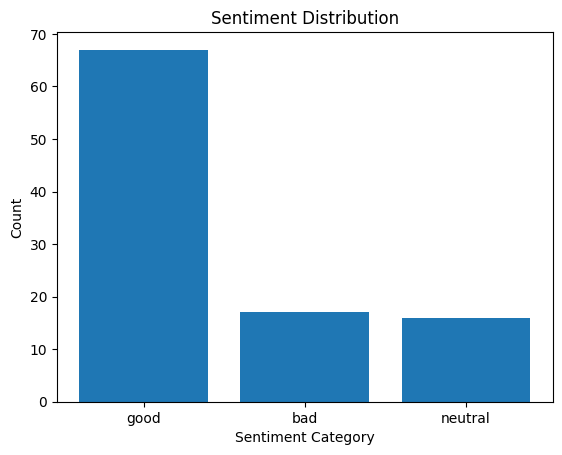

In [6]:
# Read the dataset with sentiments from the CSV file
sentiment_df = pd.read_csv('sentiment_dataset.csv')

# Count the number of each sentiment category
sentiment_counts = sentiment_df['sentiment'].value_counts()

# Create a bar plot to visualize the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()